In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### cv2.threshold(src, thresh, maxval, type[, dst])
当像素值高于阈值时，给这个像素一个新值（可能是白色），否者我们给予它另外一种颜色（可能是黑色）。
+ src:灰度图
+ thresh：阈值，取值范围0～255
+ maxval：填充色，取值范围0～255
+ type：阈值类型:
    - THRESH_BINARY,
    - THRESH_BINARY_INV,
    - THRESH_TRUNC,
    - THRESH_TOZERO,
    - THRESH_TOZERO_INV,
    - THRESH_OTSU,
    - THRESH_TRIANGLE,
    - THRESH_MASK

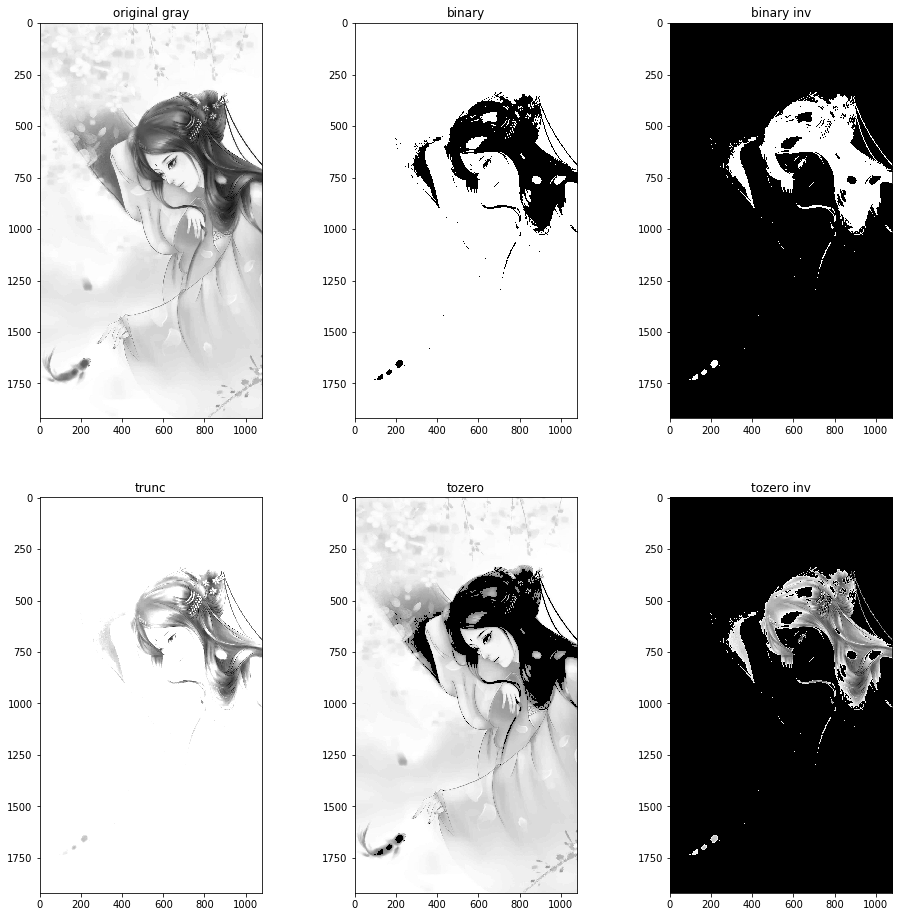

In [2]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret_binary, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret_binary_inv, img_binary_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret_trunc, img_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret_tozero, img_tozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret_tozero_inv, img_tozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

names = ['original gray', 'binary', 'binary inv', 'trunc', 'tozero', 'tozero inv']
imgs = [img, img_binary, img_binary_inv, img_trunc, img_tozero, img_tozero_inv]
fig, axes = plt.subplots(2, 3, figsize=[16, 16])
for ax, img, name in zip(axes.flatten(), imgs, names):
    ax.imshow(img, cmap='gray')
    ax.set_title(name)
plt.show()

#### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
+ src // 输入图像  
+ maxValue // 向上最大值  
+ adaptiveMethod // 自适应方法，平均或高斯  
    + ADAPTIVE_THRESH_MEAN_C
    + ADAPTIVE_THRESH_GAUSSIAN_C
+ thresholdType // 阈值化类型  
+ blockSize // 块大小  
+ C // 常量


通过计算每个像素周围bxb大小像素块的加权均值并减去常量C得到。其中，b由blockSize给出，大小必须为奇数；如果使用平均的方法，则所有像素周围的权值相同；如果使用高斯的方法，则（x,y）周围的像素的权值则根据其到中心点的距离通过高斯方程得到。



##### cv2.threshold是全局阈值方法，整幅图像采用同一个阈值
##### cv2.adaptiveThreshold为自适应阈值方法，自适应阈值化能够根据图像不同区域亮度分布的，改变阈值，该方法对图像上每一个小区域计算对应的阈值，可以使我们在亮度不同的情况下得到更好的结果。

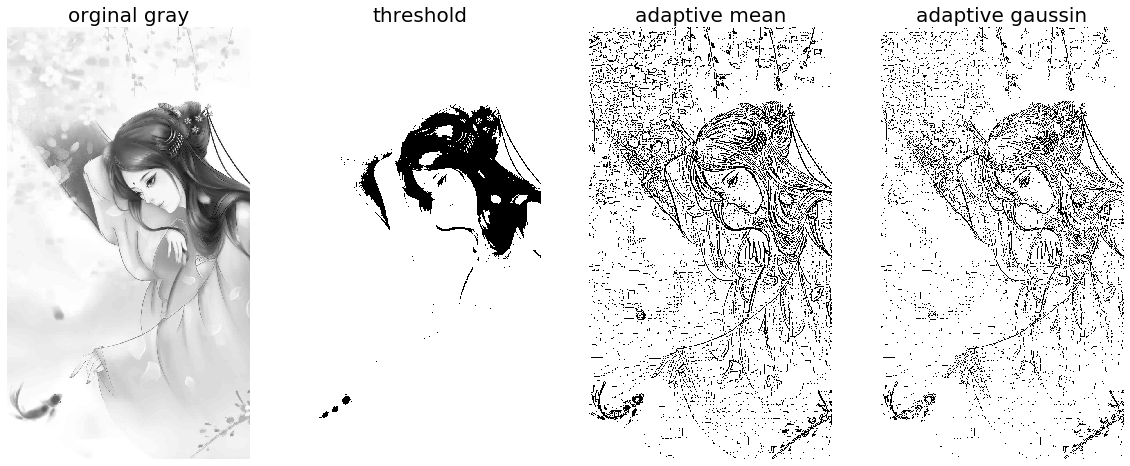

In [3]:
img = cv2.imread('./anime.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret_thresh, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
img_adpthresh_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
img_adpthresh_gauss = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
names = ['orginal gray', 'threshold', 'adaptive mean', 'adaptive gaussin']
imgs = [img_gray, img_thresh, img_adpthresh_mean, img_adpthresh_gauss]

fig, axes = plt.subplots(1, 4, figsize=[20, 20])
for ax, img, name in zip(axes.flatten(), imgs, names):
    ax.imshow(img, cmap='gray')
    ax.set_axis_off()
    ax.set_title(name, fontsize=20)
plt.show()

在使用全局侷值时虽我们就是随便给了一个数来做阈值，那么我们怎么知道选取的阈值的好坏呢？答案就是不停的尝试。但如果图像是一副双峰图像（简单来说双峰图像就是指图像直方图中存在两个峰值）我们岂不是应该在这两个峰值之间选取一个值作为我们的阈值？这就是Otsu二值化方法要做的事情。简单来说就是对一副双峰图像根据直方图自动计算得到一个位于两峰值之间的值作为阈值（对于非双峰图像，该方法效果不太理想）

使用Otsu方法用到的函数还是cv2.threshold()，但是需要多传入一个flag（cv2.THRESH_OTSU）.因为Otsu方法会产生一个阈值，那么函数cv2.threshold的的第二个参数（thresh）就可以设为0了。

Otsu算法的核心思想：在进行阈值化时，考虑所有可能的阈值，分别计算低于阈值和高于阈值像素的方差，使下式最小化的值作为阈值.两类像素方差的权值由两类像素的个数决定。这种阈值化的结果相对来说比较理想，可以避免寻找合适阈值的操作，但是这种方式运算量较大，费时。

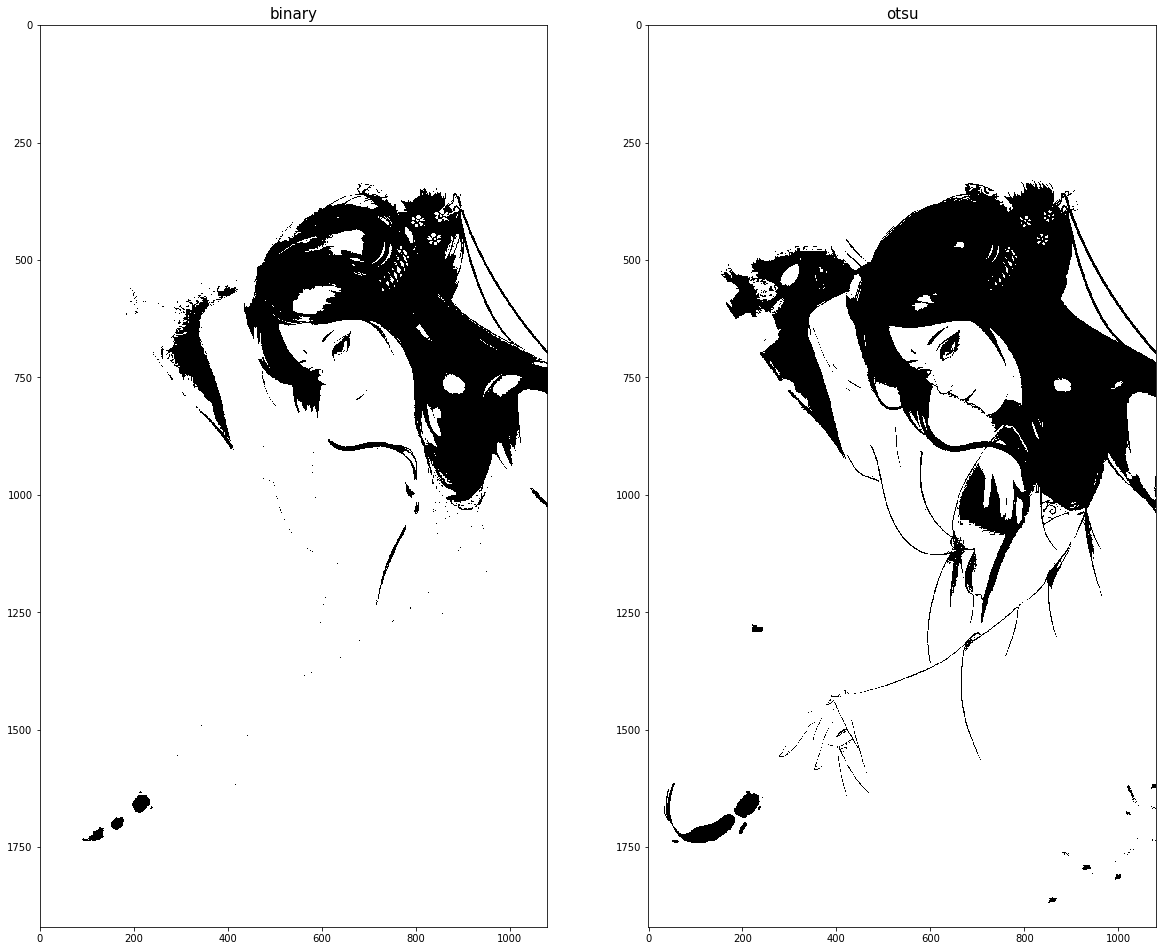

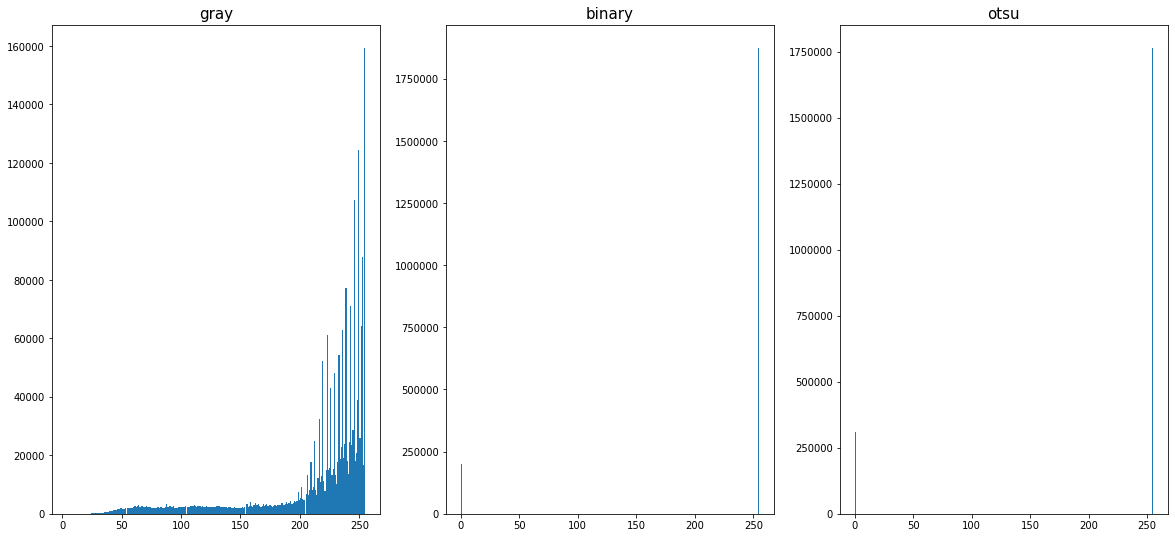

In [13]:
ret_thresh, img_binary = cv2.threshold(src=img_gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
ret_otsu, img_otsu = cv2.threshold(src=img_gray, thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)

names = ['binary', 'otsu']
imgs = [img_binary, img_otsu]
fig, axes = plt.subplots(1, 2, figsize=[20, 20])
for ax, img, name in zip(axes.flatten(), imgs, names):
    ax.imshow(img, cmap='gray')
    ax.set_title(name, fontsize=15)
plt.show()

imgs_hist = [img_gray, img_binary, img_otsu]
names = ['gray', 'binary', 'otsu']
fig, axes = plt.subplots(1, 3, figsize=[20, 9])
for ax, img, name in zip(axes.flatten(), imgs_hist, names):
    ax.hist(img.ravel(), bins=256)
    ax.set_title(name, fontsize=15)
plt.show()